In [34]:
# pip install qiskit
# pip install qiskit_aer

In [35]:
from qiskit import transpile, assemble
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator

In [36]:
from qiskit.visualization import plot_histogram

In [37]:
circuit = QuantumCircuit(3, 3)

In [38]:
circuit.x(0)
circuit.barrier(range(3))

In [39]:
circuit.h(1)

In [40]:
circuit.cx(1, 2)

In [41]:
circuit.cx(0, 1)

In [42]:
circuit.h(0)

In [43]:
circuit.barrier(range(3))

In [45]:
# circuit.measure([0, 1], [0, 1])
circuit.measure(range(2), range(2))

In [46]:
circuit.barrier(range(3))
print(circuit)

     ┌───┐ ░                ┌───┐ ░ ┌─┐   ┌─┐    ░ 
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───┤M├────░─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐└╥┘┌─┐ ░ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─╫─┤M├─░─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ║ └╥┘ ░ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──╫──╫──░─
           ░      └───┘           ░  ║  ║  ║  ║  ░ 
c: 3/════════════════════════════════╩══╩══╩══╩════
                                     0  1  0  1    


In [47]:
circuit.cx(1, 2)
circuit.cz(0, 2)

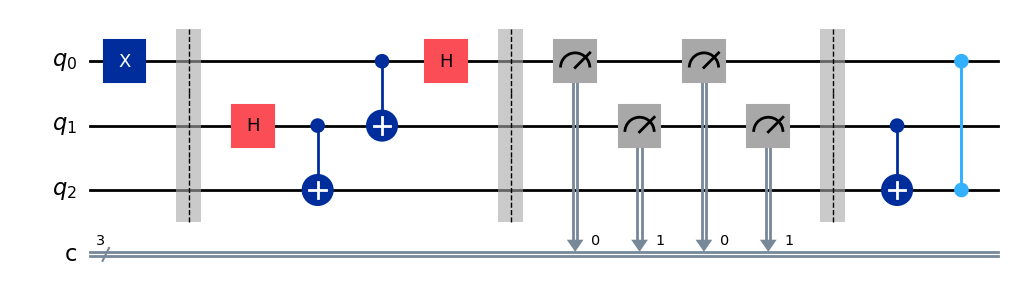

In [48]:
circuit.draw(output='mpl')

In [49]:
backend = AerSimulator()

In [50]:
qc_compiled = transpile(circuit, backend)
qobj = assemble(qc_compiled, shots=1024)

C:\Users\YASHANK\AppData\Local\Temp\ipykernel_25136\95896225.py:2: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  qobj = assemble(qc_compiled, shots=1024)


In [51]:
print(qc_compiled)

     ┌───┐ ░                ┌───┐ ░ ┌─┐   ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐└╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩══╩══╩════════════
                                     0  1  0  1            


In [52]:
job_sim = backend.run(qobj)
# result_sim = job_sim.result()

In [60]:
job_sim.status()

<JobStatus.ERROR: 'job incurred error'>

In [63]:
print(f"Job Status: {job_sim.status()}")

Job Status: JobStatus.ERROR


In [66]:
if job_sim.status() == 'ERROR':
    print(f"Error Message: {job_sim.error_message()}")

In [67]:
if job_sim.status()=='COMPLETED':
    result_sim=job_sim.result()
    counts=result_sim.get_counts(qc_compiled)
    print(counts)
    plot_histogram(counts)